In [1]:
# Just the normal prequisites for using matplotlib and numpy in a Jupyter notebook
%matplotlib inline
# Use the svg backend, in my opinion it just makes better looking plots
%config InlineBackend.figure_format = 'svg'

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging( logging_level='CRITICAL')

import os
import sys
import IPython
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual
from scipy import signal
import scipy.fftpack
from PySpice.Unit import *
from PySpice.Spice.Parser import SpiceParser
from PySpice.Spice.Netlist import Circuit, SubCircuit, SubCircuitFactory
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Probe.Plot import plot
from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Math import *
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import matplotlib.pyplot as plt
import unittest

import IPython.display as ipd

#sys.path.append('../../../lib/python')
#import Spice2Wav.Spice2Wav as wav

import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()

directory_path = Path(os.path.abspath('')).resolve().parent.parent
spice_libraries_path = directory_path.joinpath("lib", "spice")
spice_library = SpiceLibrary(spice_libraries_path)

directory_path = Path(os.path.abspath('')).resolve()


![module](https://img.shields.io/badge/module-shin%20ey-yellow) ![status](https://img.shields.io/badge/status-work%20in%20progress-orange)

## *shin ey*

<a href="https://photos.app.goo.gl/pg6iZUC32rTKX5LC7"><img src="https://spielhuus.github.io/elektrophon/images/kontrast-logo-tmb.jpg" height="300px" align="right"></a>

***table of contents***

* [*about*](#about)
* [*construction*](#construction)
* [*calibration*](#calibration)
* [*usage*](#usage)
* [*credits*](#credits)
* [*links*](#links)
* [*changelog*](#changelog)
  
<br/><br/><br/><br/>

## *about*

pegel is a voltage controlled amplifier (vca). there are various designs to implement a vca. rod elliott (ESP) has an article on vca techniques [[1][1]]. diy synthesizer modules are usualy designed with an integrated vca chip [[2][2]]  or with a differential amplifier [[3][3]]. the integrated vca chips are either obsolete or rather expensive. the differential amplifier can be built with transistors only. the design has some downsides. even in the simulation the result is not symetryc and has a dc offset from the control voltage. this needs a lot of trimming to get an accurate result. but the biggest downside is, that this design can not do proper amplitude modulation (am). when the carrier signal goes below zero the base signal is completely muted. 

## *overdrive 250*


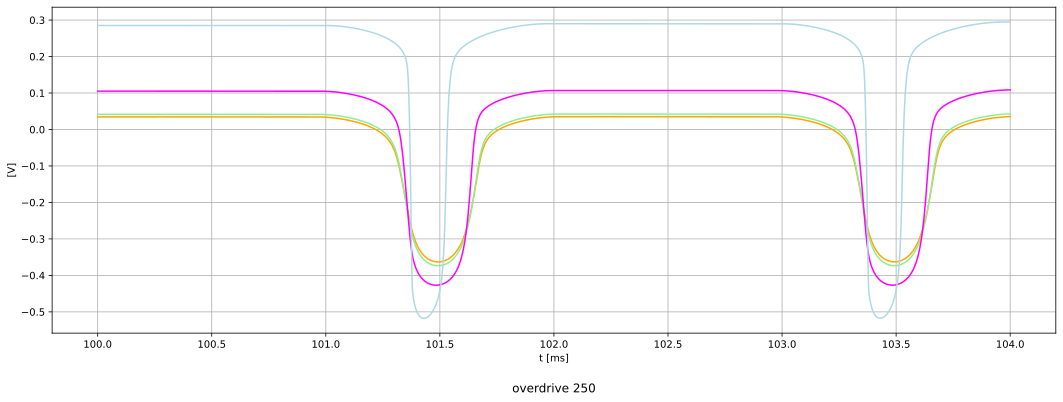

In [2]:
#load the Overdrive 250 schema
kicad_netlist_path = directory_path.joinpath('Overdrive 250/Overdrive 250.cir')
parser = SpiceParser(path=str(kicad_netlist_path))

class VoltageDivider(SubCircuitFactory):
    __name__ = 'voltage_divider'
    __nodes__ = ('n1', 'n2', 'n3' )
    def __init__(self, R=100@u_kΩ, w=0.4):
        super().__init__()
        self.R(1, 'n1', 'n2', R * w)
        self.R(2, 'n2', 'n3', R * (1.0-w) )

def overdrivePlot( drive ) :
    overdrive = parser.build_circuit(ground=5)
    overdrive.include(spice_library['TL072'])
    overdrive.include(spice_library['D1N4148'])
    overdrive.V('1', '+15V', overdrive.gnd, 'DC 9')
    overdrive.V('3', 'IN', overdrive.gnd, 'DC 0V AC 0V SIN(0 5V 500)')
    overdrive.subcircuit(VoltageDivider(R=500@u_kΩ, w=drive))
    simulator = overdrive.simulator(temperature=25, nominal_temperature=25)
    return simulator.transient(step_time=1@u_us, start_time=100@u_ms, end_time=104@u_ms)

#plot the results
fig, axis = plt.subplots(figsize=(18, 6))
analysis_shiney = overdrivePlot( 0.1 )    
#axis.plot(analysis_shiney['Net-_C1-Pad2_'].abscissa*1000, analysis_shiney['Net-_C1-Pad2_'], c='grey')  # envelope input (scaled)
axis.plot(analysis_shiney['OUT'].abscissa*1000, analysis_shiney['OUT'], c='orange')  # envelope input (scaled)
analysis_shiney = overdrivePlot( 0.25 )    
axis.plot(analysis_shiney['OUT'].abscissa*1000, analysis_shiney['OUT'], c='LightGreen')  # envelope input (scaled)
analysis_shiney = overdrivePlot( 0.75 )    
axis.plot(analysis_shiney['OUT'].abscissa*1000, analysis_shiney['OUT'], c='magenta')  # envelope input (scaled)
analysis_shiney = overdrivePlot( 0.9999 )    
axis.plot(analysis_shiney['OUT'].abscissa*1000, analysis_shiney['OUT'], c='LightBlue') 

axis.grid()
axis.set_xlabel('t [ms]')
axis.set_ylabel('[V]')
axis.set_title('overdrive 250', y=-0.2)
plt.show()


In [ ]:
ipd.Audio(filename='Overdrive 250/135402__mystified13__trianglegran1.wav')


In [ ]:
#ipd.Audio(filename='Overdrive 250/151009__khoon__rhythm-1-clean-95-bpm.wav')


In [ ]:
#ipd.Audio(filename='Overdrive 250/427847__newagesoup__150bpm-saw-chords-future-bass.wav')


In [ ]:
#ipd.Audio(filename='Overdrive 250/2278__jovica__90-bpm-attack-loop-3-square-triangle-melody-mastered-16-bit.wav')


## *Shin Ei FY-2*

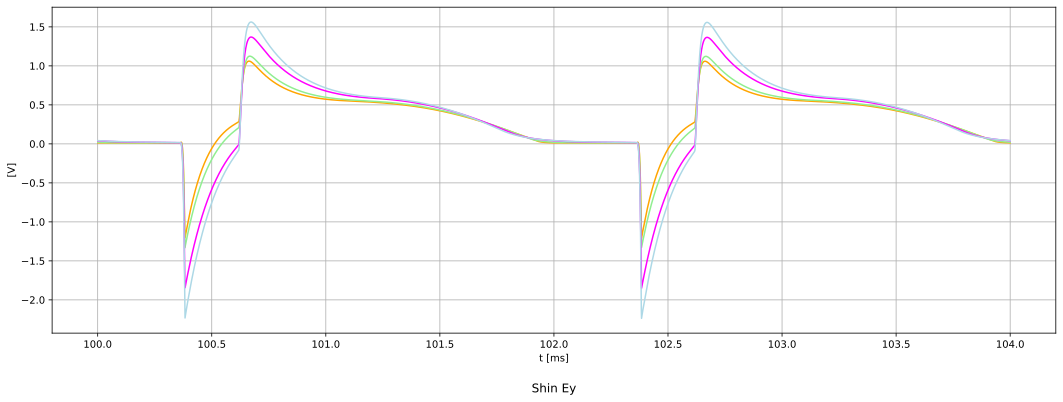

In [3]:
#load shin ey schema
kicad_netlist_path = directory_path.joinpath('Fuzz.cir')
parser = SpiceParser(path=str(kicad_netlist_path))

def shiney( drive )  :
    fuzz = parser.build_circuit(ground=5)
    fuzz.include(spice_library['BC547B'])
    fuzz.V('1', '+15V', fuzz.gnd, 'DC 15')
    fuzz.V('3', 'IN', fuzz.gnd, 'DC 0V AC 0V SIN(0 5V 500)')

    class VoltageDivider(SubCircuitFactory):
        __name__ = 'voltage_divider'
        __nodes__ = ('n1', 'n2', 'n3' )
        def __init__(self, R=100@u_kΩ, w=0.4):
            super().__init__()
            self.R(1, 'n1', 'n2', R * w)
            self.R(2, 'n2', 'n3', R * (1.0-w) )

    fuzz.subcircuit(VoltageDivider(R=100@u_kΩ, w=drive))
    simulator = fuzz.simulator(temperature=25, nominal_temperature=25)
    return simulator.transient(step_time=1@u_us, start_time=100@u_ms, end_time=104@u_ms)

fig, axis = plt.subplots(figsize=(18, 6))
analysis_shiney = shiney( 0.1 )    
#axis.plot(analysis_shiney['IN'].abscissa*1000, analysis_shiney['IN'], c='grey')  # envelope input (scaled)
axis.plot(analysis_shiney['OUT'].abscissa*1000, analysis_shiney['OUT'], c='orange')  # envelope input (scaled)
analysis_shiney = shiney( 0.25 )    
axis.plot(analysis_shiney['OUT'].abscissa*1000, analysis_shiney['OUT'], c='LightGreen')  # envelope input (scaled)
analysis_shiney = shiney( 0.75 )    
axis.plot(analysis_shiney['OUT'].abscissa*1000, analysis_shiney['OUT'], c='magenta')  # envelope input (scaled)
analysis_shiney = shiney( 0.99 )    
axis.plot(analysis_shiney['OUT'].abscissa*1000, analysis_shiney['OUT'], c='LightBlue')  # envelope input (scaled)

axis.grid()
axis.set_xlabel('t [ms]')
axis.set_ylabel('[V]')
axis.set_title('Shin Ey', y=-0.2)

plt.show()

## *Way Huge Red LLama*


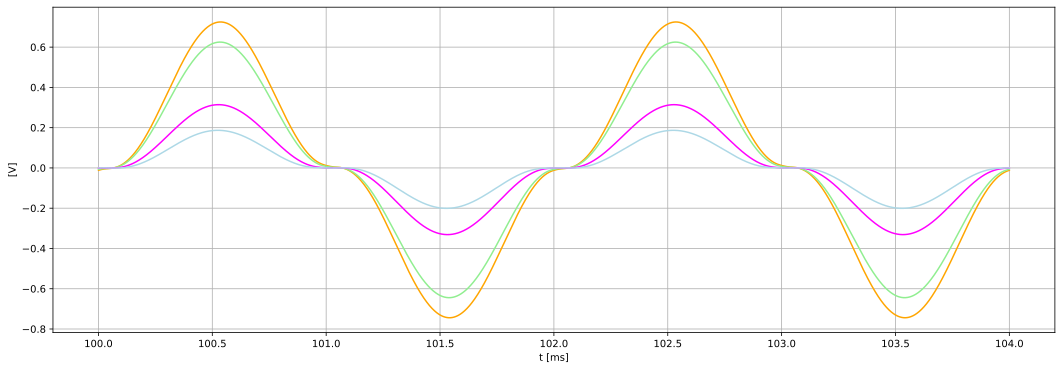

In [4]:
#load the Huge Red LLama schema
kicad_netlist_path = directory_path.joinpath('Way Huge Red LLama/Way Huge Red LLama.cir')
parser = SpiceParser(path=str(kicad_netlist_path))

def redllama( drive )  :
    redllama_circuit = parser.build_circuit(ground=5)
    redllama_circuit.include(spice_library['CD4069UBhex'])
    redllama_circuit.V('1', '+5V', redllama_circuit.gnd, 'DC 5')
    redllama_circuit.V('3', 'IN', redllama_circuit.gnd, 'DC 0V AC 0V SIN(0 0.1V 500)')
#    fuzz.V('3', 'IN', fuzz.gnd, 'DC 0V AC 0V PULSE(5V 5V 0 0 0 2m 4m)')

    class VoltageDivider(SubCircuitFactory):
        __name__ = 'voltage_divider'
        __nodes__ = ('n1', 'n2', 'n3' )
        def __init__(self, R=100@u_kΩ, w=0.4):
            super().__init__()
            self.R(1, 'n1', 'n2', R * w)
            self.R(2, 'n2', 'n3', R * (1.0-w) )

    redllama_circuit.subcircuit(VoltageDivider(R=100@u_kΩ, w=drive))
    simulator = redllama_circuit.simulator(temperature=25, nominal_temperature=25)
    return simulator.transient(step_time=1@u_us, start_time=100@u_ms, end_time=104@u_ms)

fig, axis = plt.subplots(figsize=(18, 6))
analysis_redllama = redllama( 0.1 )    
#axis.plot(analysis_redllama['IN'].abscissa*1000, analysis_redllama['IN'], c='grey')  # envelope input (scaled)
axis.plot(analysis_redllama['OUT'].abscissa*1000, analysis_redllama['OUT'], c='orange')  # envelope input (scaled)
analysis_redllama = redllama( 0.25 )    
axis.plot(analysis_redllama['OUT'].abscissa*1000, analysis_redllama['OUT'], c='LightGreen')  # envelope input (scaled)
analysis_redllama = redllama( 0.75 )    
axis.plot(analysis_redllama['OUT'].abscissa*1000, analysis_redllama['OUT'], c='magenta')  # envelope input (scaled)
analysis_redllama = redllama( 0.99 )    
axis.plot(analysis_redllama['OUT'].abscissa*1000, analysis_redllama['OUT'], c='LightBlue')  # envelope input (scaled)

axis.grid()
axis.set_xlabel('t [ms]')
axis.set_ylabel('[V]')
#axis.set_title('output with a cv envelope', y=-0.2)

plt.show()

## *UBE Screamer*



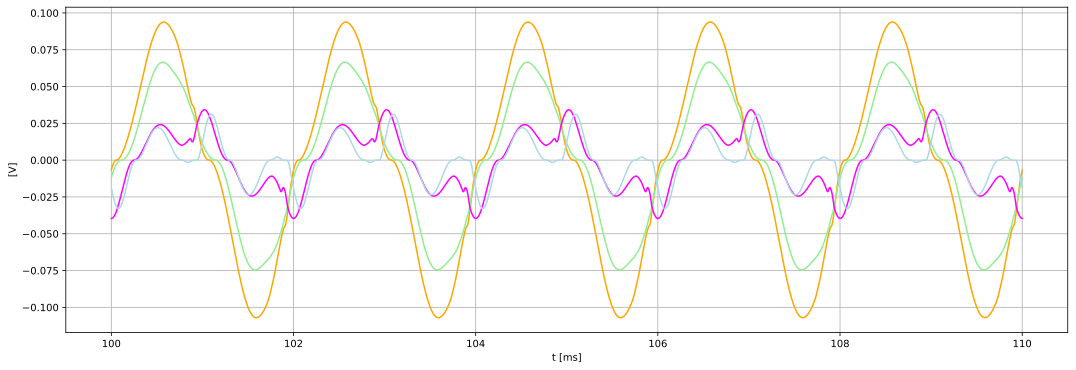

In [22]:
#load the UBE Screamer
kicad_netlist_path = directory_path.joinpath('UBE Screamer/UBE Screamer.cir')
parser = SpiceParser(path=str(kicad_netlist_path))

def ube( drive )  :
    ube_circuit = parser.build_circuit(ground=5)
    ube_circuit.include(spice_library['CD4069UBhex'])
    ube_circuit.include(spice_library['D1N4148'])
    ube_circuit.V('1', '+5V', ube_circuit.gnd, 'DC 5')
    ube_circuit.V('3', 'IN', ube_circuit.gnd, 'DC 0V AC 0V SIN(0 0.5V 500)')

    class VoltageDivider1(SubCircuitFactory):
        __name__ = 'voltage_divider_1'
        __nodes__ = ('n1', 'n2', 'n3' )
        def __init__(self, R=100@u_kΩ, w=0.4):
            super().__init__()
            self.R(1, 'n1', 'n2', R * w)
            self.R(2, 'n2', 'n3', R * (1.0-w) )

    class VoltageDivider2(SubCircuitFactory):
        __name__ = 'voltage_divider_2'
        __nodes__ = ('n1', 'n2', 'n3' )
        def __init__(self, R=100@u_kΩ, w=0.4):
            super().__init__()
            self.R(1, 'n1', 'n2', R * w)
            self.R(2, 'n2', 'n3', R * (1.0-w) )

    ube_circuit.subcircuit(VoltageDivider1(R=500@u_kΩ, w=drive))
    ube_circuit.subcircuit(VoltageDivider2(R=500@u_kΩ, w=0.5))
    simulator = ube_circuit.simulator(temperature=25, nominal_temperature=25)
    return simulator.transient(step_time=1@u_us, start_time=100@u_ms, end_time=110@u_ms)

fig, axis = plt.subplots(figsize=(18, 6))
analysis_ube= ube( 0.1 )    
#axis.plot(analysis_ube['IN'].abscissa*1000, analysis_ube['IN'], c='grey')  # envelope input (scaled)
axis.plot(analysis_ube['OUT'].abscissa*1000, analysis_ube['OUT'], c='orange')  # envelope input (scaled)
analysis_ube = ube( 0.25 )    
axis.plot(analysis_ube['OUT'].abscissa*1000, analysis_ube['OUT'], c='LightGreen')  # envelope input (scaled)
analysis_ube = ube( 0.75 )    
axis.plot(analysis_ube['OUT'].abscissa*1000, analysis_ube['OUT'], c='magenta')
analysis_ube = ube( 0.99 )    
axis.plot(analysis_ube['OUT'].abscissa*1000, analysis_ube['OUT'], c='LightBlue') 

axis.grid()
axis.set_xlabel('t [ms]')
axis.set_ylabel('[V]')
#axis.set_title('output with a cv envelope', y=-0.2)

plt.show()

In [6]:
## *UBE Screamer without tone control*


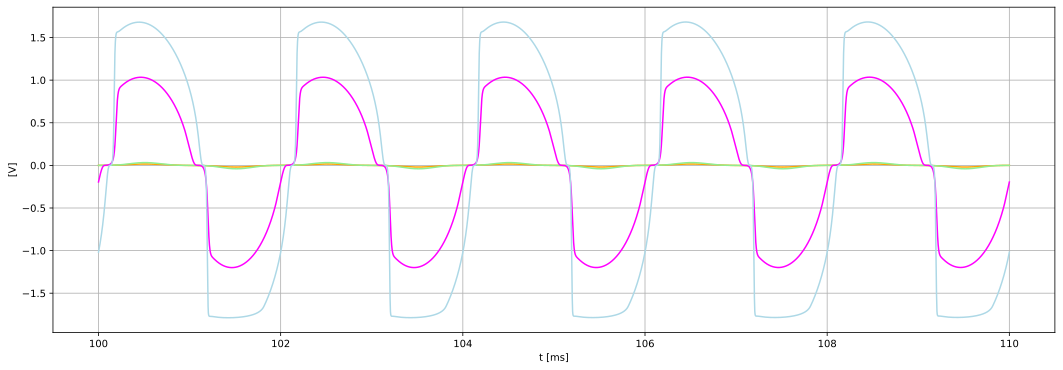

In [23]:
#load the UBE Screamer
kicad_netlist_path = directory_path.joinpath('UBE Screamer (no tone)//UBE Screamer.cir')
parser = SpiceParser(path=str(kicad_netlist_path))

def ube( drive )  :
    ube_circuit = parser.build_circuit(ground=5)
    ube_circuit.include(spice_library['CD4069UBhex'])
    ube_circuit.include(spice_library['D1N4148'])
    ube_circuit.V('1', '+5V', ube_circuit.gnd, 'DC 5')
    ube_circuit.V('3', 'IN', ube_circuit.gnd, 'DC 0V AC 0V SIN(0 1V 500)')

    class VoltageDivider1(SubCircuitFactory):
        __name__ = 'voltage_divider_1'
        __nodes__ = ('n1', 'n2', 'n3' )
        def __init__(self, R=100@u_kΩ, w=0.4):
            super().__init__()
            self.R(1, 'n1', 'n2', R * w)
            self.R(2, 'n2', 'n3', R * (1.0-w) )

    ube_circuit.subcircuit(VoltageDivider1(R=500@u_kΩ, w=drive))
    simulator = ube_circuit.simulator(temperature=25, nominal_temperature=25)
    return simulator.transient(step_time=1@u_us, start_time=100@u_ms, end_time=110@u_ms)

fig, axis = plt.subplots(figsize=(18, 6))
analysis_ube= ube( 0.1 )    
#axis.plot(analysis_ube['IN'].abscissa*1000, analysis_ube['IN'], c='grey')  # envelope input (scaled)
axis.plot(analysis_ube['OUT'].abscissa*1000, analysis_ube['OUT'], c='orange')  # envelope input (scaled)
analysis_ube = ube( 0.25 )    
axis.plot(analysis_ube['OUT'].abscissa*1000, analysis_ube['OUT'], c='LightGreen')  # envelope input (scaled)
analysis_ube = ube( 0.75 )    
axis.plot(analysis_ube['OUT'].abscissa*1000, analysis_ube['OUT'], c='magenta')  # envelope input (scaled)
analysis_ube = ube( 0.99 )    
axis.plot(analysis_ube['OUT'].abscissa*1000, analysis_ube['OUT'], c='LightBlue')  # envelope input (scaled)

axis.grid()
axis.set_xlabel('t [ms]')
axis.set_ylabel('[V]')
#axis.set_title('output with a cv envelope', y=-0.2)

plt.show()

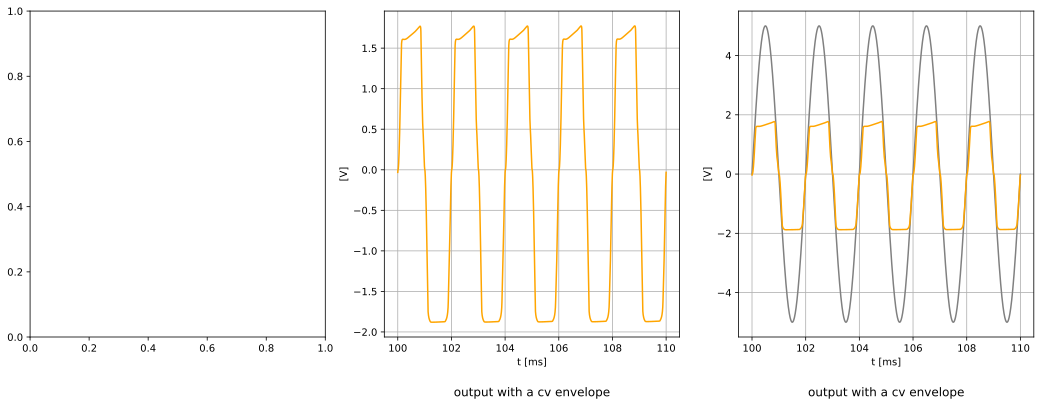

In [8]:
#load the UBE Screamer
kicad_netlist_path = directory_path.joinpath('UBE Screamer/UBE Screamer.cir')
parser = SpiceParser(path=str(kicad_netlist_path))

ube = parser.build_circuit(ground=5)
ube.include(spice_library['CD4069UBhex'])
ube.include(spice_library['D1N4148'])
ube.V('1', '+5V', ube.gnd, 'DC 5')
ube.V('3', 'IN', ube.gnd, 'DC 0V AC 0V SIN(0 5V 500)')

class VoltageDivider1(SubCircuitFactory):
    __name__ = 'voltage_divider_1'
    __nodes__ = ('n1', 'n2', 'n3' )
    def __init__(self, R=100@u_kΩ, w=0.4):
        super().__init__()
        self.R(1, 'n1', 'n2', R * w)
        self.R(2, 'n2', 'n3', R * (1.0-w) )

class VoltageDivider2(SubCircuitFactory):
    __name__ = 'voltage_divider_2'
    __nodes__ = ('n1', 'n2', 'n3' )
    def __init__(self, R=100@u_kΩ, w=0.4):
        super().__init__()
        self.R(1, 'n1', 'n2', R * w)
        self.R(2, 'n2', 'n3', R * (1.0-w) )

ube.subcircuit(VoltageDivider1(R=500@u_kΩ, w=0.5))
ube.subcircuit(VoltageDivider2(R=500@u_kΩ, w=0.5))

simulator = ube.simulator(temperature=25, nominal_temperature=25)
analysis_ube = simulator.transient(step_time=1@u_us, start_time=100@u_ms, end_time=110@u_ms)

#plot the results
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1, ncols=3, sharex=False, figsize=(18, 6))

#plot the image
#img_diffpair_path = directory_path.joinpath('diffpair', 'diffpair.png')
#img_diffpair = mpimg.imread(str(img_diffpair_path))
#im = ax0.imshow(img_diffpair)
#ax0.axis('off')
#ax0.set_title('long tailed pair differential amplifier', y=-0.2)
        
#plot with envelope
ax1.plot(analysis_ube['OUT'].abscissa*1000, analysis_ube['OUT'], c='orange')  # differential output
ax1.grid()
ax1.set_xlabel('t [ms]')
ax1.set_ylabel('[V]')
ax1.set_title('output with a cv envelope', y=-0.2)

#plot with envelope
ax2.plot(analysis_ube['IN'].abscissa*1000, analysis_ube['IN'], c='grey')  # envelope input (scaled)
ax2.plot(analysis_ube['OUT'].abscissa*1000, analysis_ube['OUT'], c='orange')  # differential output
ax2.grid()
ax2.set_xlabel('t [ms]')
ax2.set_ylabel('[V]')
ax2.set_title('output with a cv envelope', y=-0.2)

plt.show()

first we design the input stage. the input voltage for the X signal should be 10mV and 20mV for the control voltage.


## *references*

- [VCA Techniques Investigated][1] Rod Elliott (ESP)
- [Popular Electronics][2] Keyiing and VCA citcuits for electronic music instruments 
- [VCA-1][3] Thomas Henry CA3080 vca
- [VCA-3][4] René Schmitz differential pair vca
- [#223][5]: Basics of the Gilbert Cell | Analog Multiplier | Mixer | Modulator
- [#224][6]: AM & DSB-SC Modulation with the Gilbert Cell
- [Analog Devices][8]: Analog multiplier application guide 
- [AD633][9]: Datasheet 

http://beavisaudio.com/schematics/DOD-250-Overdrive-Schematic.htm

https://www.diystompboxes.com/smfforum/index.php?topic=118397.0
https://www.diystompboxes.com/smfforum/index.php?topic=99779.0
http://beavisaudio.com/schematics/Way-Huge-Red-Llama-Schematic.htm
http://www.runoffgroove.com/ubescreamer.html


[1]: https://static1.squarespace.com/static/5e6e99e8bd2f8a6de8454feb/t/5e77db16e8ff44374c24b124/1584913176675/MBD+BOM+and+build.pdf

[2]: https://www.diystompboxes.com/smfforum/index.php?topic=118397.0
[3]: https://www.diystompboxes.com/smfforum/index.php?topic=99779.0



